<h1 style='text-align: center;'> Statistics Assignment 2 </h1>
<h2 style='text-align: center;'> Miriam North Ridao </h2>
    
### 1. Introduction

We consider a multivariate linear-Gaussian state-space model.
\begin{align}
\mathbf{x}_{t}=\mathbf{A}\mathbf{x}_{t-1} + \mathbf{q}_t, \quad \mathbf{q}_t \sim \mathcal{N}(\mathbf{0}, \mathbf{Q}) \\
\mathbf{y}_t = \mathbf{H}\mathbf{x}_t + \mathbf{r}_t, \quad \mathbf{r}_t \sim \mathcal{N}(\mathbf{0}, \mathbf{R})
\end{align}
This is described by two main components: the state transition model and the observation model. The state transition model describes how the hidden state vector evolves over time, incorporating both deterministic dynamics and process noise. The dynamics of the system are described by the state transition matrix (A), and the process noise is modelled as a Gaussian with zero mean and covariance matrix Q. An observation model describes the relationship between the hidden state vector and the observed measurements, and comprises the observation matrix (H) as well as observed Gaussian noise, again with zero mean, and with covariance Q.

In this project, we consider a simple toy problem adapted from Section 5.3 of (Akyildiz and Míguez, 2020), which is described by the state transition model,
\begin{align}
\mathbf{A} =
\begin{bmatrix}
\mathbf{I}_2 & k \mathbf{I}_2 \\
\mathbf{0}_2 & 0.99 \mathbf{I}_2
\end{bmatrix}, 
\quad 
\mathbf{Q} =
\begin{bmatrix}
\frac{k^3}{3} \mathbf{I}_2 & \frac{k^2}{2} \mathbf{I}_2 \\
\frac{k^2}{2} \mathbf{I}_2 & k \mathbf{I}_2
\end{bmatrix}
\end{align}
and the observation model,
\begin{align}
\mathbf{H} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix},
\quad 
\mathbf{R} = 0.1 \cdot
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\end{align}

This model could represent an object tracking problem in two-dimensions, where the object's position and velocity represents the state space. The observation model could describe the position of the target, measured by sensors located in the environment. The model depends on a parameter k, which determines the coupling between the position and velocity components in the state transition matrix.

In such tracking scenarios, we typically only have access to noisy observations (y) from sensors. Rather than focusing on these noisy measurements, the goal is to estimate the hidden state (x) of the system. Filtering techniques, such as kalman or particle filters, allow us to infer the underlying state from noisy data effectively. Throughout this project, the seed is kept fixed. This means that all true states and observations are kept fixed for constant values of k, number of particles and monte carlo runs. 

In [1]:
import demos.runFilter as runFilter
import demos.plotters as plotters

### 2. Kalman Filter

The Kalman Filter is a deterministic filtering technique used to estimate the hidden state ($\mathbf{x_t}$) of a linear dynamic system from noisy observations, which assumes that the underlying system can be modelled by a linear-Gaussian state space model. It estimates both the mean and covariance of the hidden states, providing a probabilistic representation of the system, and it updates estimates for the current state as observations are received. The mean serves as a point estimator for the state, while the covariance quantifies the uncertainty of the estimate.

The filter is run for $1000$ iterations, and with $k=0.04$, and the trajectory position is estimated.

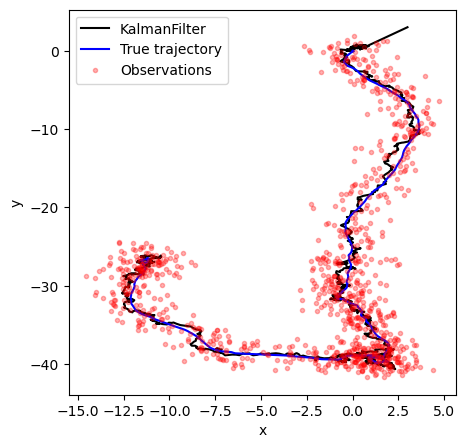

In [2]:
runFilter.runFilter("kalman")

Figure 1: Comparison of the Kalman filter's estimated trajectory (black) and the true trajectory (blue), based on the observations (red).

Figure 1 shows the Kalman filter's estimation (mean of the posterior distribution) given the noisy observations, compared with the true trajectory. The filter acts to smooth out the noisy observations, and appears to more closely approximate the true trajectory over time, as more observations are accumulated. Since this filter is deterministic, running it multiple times will produce the same estimated trajectory.

### 3. Particle Filter

The particle filter is another filtering technique that we can use to estimate the hidden state of the system. Unlike the Kalman filter, it makes no assumptions about the distributions of the model, and it is therefore more flexible in its application. Also unlike the Kalman filter, which tracks only the mean and covariance of the state, the particle filter represents the state distribution using a set of discrete particles. Each particle is a possible realization of the state, and the filter assigns weights to these particles based on their consistency with the observations. This approach allows it to handle more complex and multimodal distributions, making it again more flexible than the Kalman filter. To avoid the problem of weight degeneracy, resampling occurs at each iteration according to their weights.

The filter is run for $1000$ iterations, and with $k=0.04$, and the trajectory position is estimated. Additionally, the number of particles used is $1000$. The same observations and true trajectory are used as in the case of Figure 1.

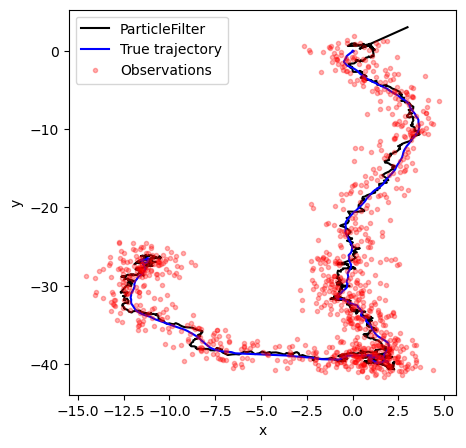

In [3]:
runFilter.runFilter("particle")

Figure 2: Comparison of the Particle filter's estimated trajectory (black) and the true trajectory (blue), based on the observations (red).

Figure 2 shows the particle filter's estimated trajectory, compared with the true trajectory. Similar to the Kalman filter, the filter smooths out the noisy observations, and again appears to get more accurate over time. It does not appear (from looking with my eyes) that the particle filter gives any advantages over the kalman filter for this model, since it is a very simple model, which can be predicted sufficiently by the Kalman filter.

### 4. Marginal Likelihood Calculation

The marginal likelihood can be calculated at each iteration by the filters, and can be used to rank the different models based on how well they fit the data. For practical purposes, the marginal likelihood is often computed in log-space to avoid numerical instability due to the product of probabilities. The log marginal likelihood is expressed as,

\begin{align}
\log p(\mathbf{y}_{1:T}) = \sum_{t=1}^T \log p(\mathbf{y}_t \mid \mathbf{y}_{1:t-1}).
\end{align}

In the case of the Kalman filter, the formula for the marginal likelihood is Gaussian, and the likelihood can therefore be calculated analytically. For the particle filter, the marginal likelihood is calculated using a Monte Carlo approximation of the observation model. 

In this report, we have assumed the parameter k to be known. However, in practice, system parameters often carry uncertainty and may follow an unknown distribution. In such cases, the marginal likelihood can be used to provide point estimates for these parameters by framing the problem as an optimization task, where the marginal likelihood serves as the objective function to be maximized.  Care must be taken when using local optimizers, as they may converge to a local maximum or plateau in complex parameter distributions, resulting in suboptimal estimates. This has not been pursued further here.

### 5. Marginal Likelihood Variation

Since the Kalman filter is deterministic, it computes a fixed value for the marginal log-likelihood given constant k and a fixed number of iterations.  In contrast, the particle filter, being stochastic, provides a probabilistic estimate of the marginal log-likelihood. To compare the two, we run the particle filter multiple times (Monte Carlo runs) while varying the number of particles used in the algorithm. The results are then compared with the fixed value calculated by the Kalman Filter.

It is shown in (INSERT CITATION) that the error in the particle filter approximation decreases at a rate proportional to $1/\sqrt{N}$, where N is the number of particles. This is according to the expression, 
\begin{align}
(\varphi, \pi_t) - (\varphi, \pi_t^N) \|_2 \leq \frac{c_t \| \varphi \|_\infty}{\sqrt{N}},
\end{align}

where $\pi_t$ is the exact posterior distribution at time $ t $, $\pi_t^N$ is the particle filter approximation with $N $ particles, $\varphi$ is a bounded test function with $\|\varphi \|_\infty $ denoting its supremum norm, and $c_t$ is a constant. This result holds under the condition that the likelihood model is both positive and bounded. Since the underlying system is a multivariate linear-Gaussian state space model, the marginal likelihood calculated by the Kalman filter should be exact. We therefore expect that as the number of particles is increased, the average value of the marginal log-likelihood calculated by the particle filter should converge to that of the Kalman filter. We can also expect the variance to decrease. 


To speed up the simulations, we now run for 50 total iterations. In the following, boxplots of the marginal log-likelihood calculated by the particle filter are shown for the different scenarios. These are shown compared with the value calculated by the Kalman filter (red-dash).

In [4]:
numParticlesLst = [500, 1000, 2000]
k, T = 0.04, 50

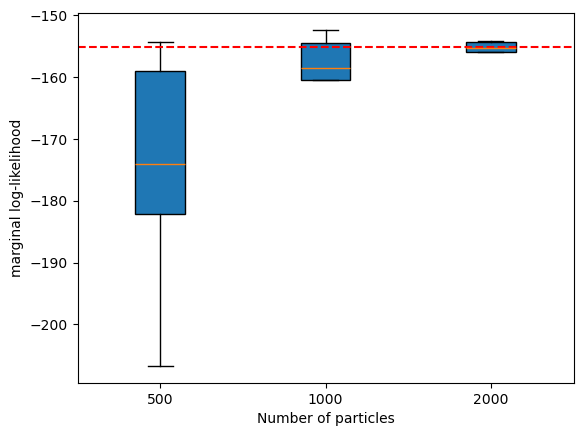

Means = [-175.20770444 -160.19808983 -156.27485168]
Stds = [18.67185335  8.03817453  2.77443834]


In [20]:
numRuns = 5
likelihoods, klogli = runFilter.runParticleFilterEnsemble(k, T, numParticlesLst, numRuns)
plotters.plotBoxes(likelihoods, klogli, numParticlesLst)

runFilter.printMeans(likelihoods)
runFilter.printStds(likelihoods)

Figure 3: Boxplot of the marginal log-likelihood calculated by the particle filter when using a different total number of particles. Each boxplot is based on 5 Monte Carlo runs for the corresponding particle count. Kalman filter result also shown (red-dash).

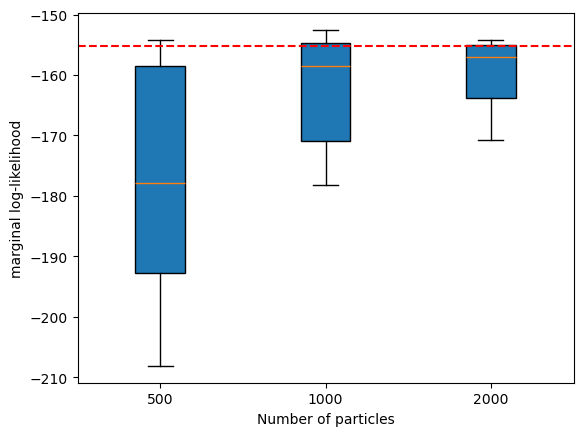

Means = [-177.94018232 -165.92212802 -159.59125462]
Stds = [19.4798699  17.31210436  5.47909696]


In [21]:
numRuns = 10
likelihoods, klogli = runFilter.runParticleFilterEnsemble(k, T, numParticlesLst, numRuns)
plotters.plotBoxes(likelihoods, klogli, numParticlesLst)

runFilter.printMeans(likelihoods)
runFilter.printStds(likelihoods)

Figure 4: Boxplot of the marginal log-likelihood calculated by the particle filter when using a different total number of particles. Each boxplot is based on 10 Monte Carlo runs for the corresponding particle count. Kalman filter result also shown (red-dash).

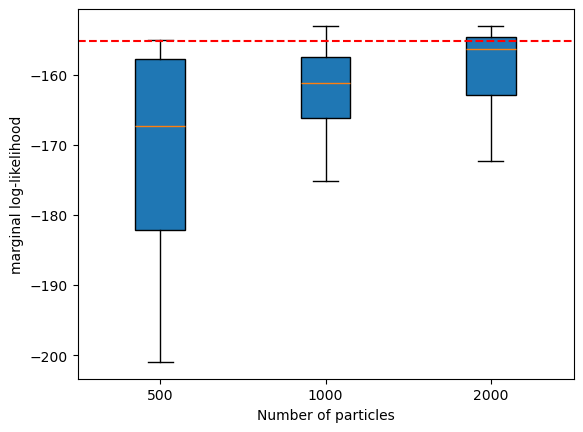

Means = [-179.45099603 -166.66879305 -160.23039363]
Stds = [34.46059189 17.54576221  8.10692865]


In [16]:
numRuns = 20
likelihoods, klogli = runFilter.runParticleFilterEnsemble(k, T, numParticlesLst, numRuns)
plotters.plotBoxes(likelihoods, klogli, numParticlesLst)

runFilter.printMeans(likelihoods)
runFilter.printStds(likelihoods)

Figure 5: Boxplot of the marginal log-likelihood calculated by the particle filter when using a different total number of particles. Each boxplot is based on 20 Monte Carlo runs for the corresponding particle count. Kalman filter result also shown (red-dash).

The Kalman filter estimate for the marginal likelihood is:

In [17]:
print(klogli)

-155.12120497326129


TThe results show that, in all cases, the variance in the marginal likelihood estimate decreases as the number of particles increases. Additionally, the mean of the particle filter estimate appears to approach the Kalman filter result, though this is not guaranteed. To confirm this, we would need to run the particle filter more times, and check the marginal likelihood estimate with more values of $N$. We could then calculate the $l_2$ norm of the difference between each particle filter estimate and the Kalman filter result, and check if it scales according to $1/\sqrt{N}$. This is the expected result, and deviations from this could be explained as below. I have not done this due to time limitations. 

Interestingly, increasing the number of Monte Carlo runs has not appeared to improve the estimate of the particle filter estimate, or reduce the variance in the results (as I would have expected). Maybe:
- Not enough particles for the particle filter
- Resampling not working well, leading to weight degeneracy
- bug in my code in marginal likelihood estimation
- My expectations are wrong

More thinking required.

### References

Akyildiz, Ö. D., & Míguez, J. (2020). Nudging the particle filter. Statistics and Computing, 30, 305–330. https://doi.org/10.1007/s11222-019-09884-y